In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

In [48]:
df = pd.read_csv('../ranks.csv', index_col=0)

# Define sample types
sample_types = ['Water', 'Sediment', 'Gut flora', 'Feces']

# Create a 2x2 grid of subplots for heatmaps
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Create heatmaps for each sample type
for i, sample_type in enumerate(sample_types):
    ax = axes[i]
    columns_list = ['Simplicity', 'Cost per sample'] + df.columns[df.columns.str.contains(sample_type)].tolist()

    sample_df = df[columns_list]
    # Remove sample type prefix from column names
    sample_df.columns = sample_df.columns.str.replace(f'{sample_type}_', '', regex=False)
    sns.heatmap(sample_df, annot=True, cmap='Blues_r', ax=ax)
    ax.set_title(f'{sample_type.capitalize()}')
    if i != 3:
        ax.tick_params(labelbottom=False)

plt.tight_layout()
plt.savefig('../plots/sample_type_heatmaps.pdf', format='pdf', bbox_inches='tight')
plt.close()



In [17]:
common_kits = ['MagBac', 'MagMic', 'MagSoi', 'MagSto', 'SilMet', 'SilSoi', 'SkySto', 'SkySoi']
kits_dict = {}
for t in sample_types:
    if t == 'Water':
        kits_dict[t] = common_kits + ['B&T']
    elif t == 'Feces':
        kits_dict[t] = common_kits + ['PowSoi', 'PowFec']
    elif t in ('Gut flora', 'Sediment'):
        kits_dict[t] = common_kits + ['PowSoi']
    else:
        kits_dict[t] = common_kits

In [33]:
cur_df

,Feces_DNA,Feces_DIN,Feces_Contamination,Feces_Shannon,Feces_Reproducibility,Simplicity,Cost per sample,Total
Kit,,,,,,,,
MagBac,4.0,8.0,1.0,3.0,1.0,3,1,21.0
MagMic,7.0,9.0,1.0,4.0,3.0,3,6,33.0
MagSoi,8.0,2.0,1.0,3.0,2.0,3,4,23.0
MagSto,6.0,1.0,1.0,2.0,6.0,3,6,25.0
SilMet,9.0,7.0,1.0,1.0,2.0,4,2,26.0
SilSoi,5.0,10.0,1.0,5.0,4.0,4,2,31.0
SkySto,2.0,3.0,1.0,5.0,5.0,2,5,23.0
SkySoi,10.0,5.0,1.0,6.0,2.0,2,5,31.0
PowSoi,3.0,4.0,1.0,1.0,3.0,1,8,21.0


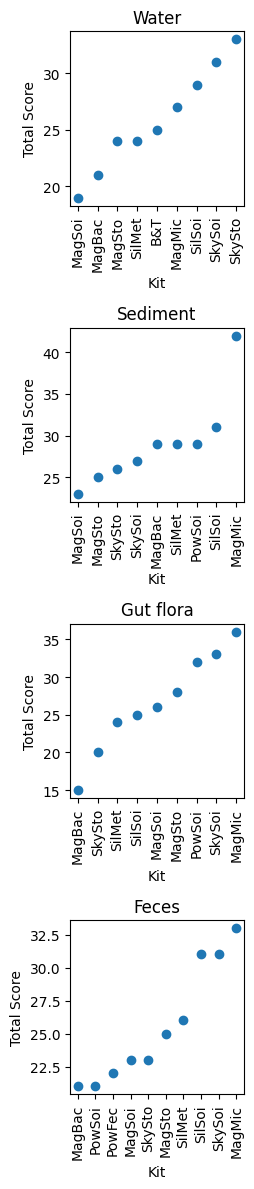

In [56]:
# Create subplots for each sample type
fig, axes = plt.subplots(4, 1, figsize=(5, 12))
axes = axes.ravel()

for i, sample_type in enumerate(sample_types):
    # Get columns for this sample type
    cols = df.columns[df.columns.str.contains(sample_type)].tolist() + ['Simplicity', 'Cost per sample']
    cur_df = df[cols]
    cur_df = cur_df[cur_df.index.isin(kits_dict[sample_type])]
    cur_df['Total'] = cur_df.sum(axis=1)
    
    # Plot total scores
    sorted_scores = cur_df['Total'].sort_values()
    axes[i].plot(sorted_scores, 'o')
    axes[i].set_xticks(range(len(sorted_scores)))
    axes[i].set_xticklabels(sorted_scores.index, rotation=90)
    
    axes[i].set_title(f'{sample_type}')
    axes[i].set_xlabel('Kit')
    axes[i].set_ylabel('Total Score')
    axes[i].tick_params(axis='x', rotation=90)
    
    # Set equal aspect ratio for subplot
    axes[i].set_box_aspect(1)

plt.tight_layout()
plt.savefig('../plots/kits_total_ranks.pdf', format='pdf', bbox_inches='tight')